# Imports

In [1]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
import numpy as np

from shared_modeling_simulation import get_paths

save_dir = 'C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/map_indiv/new_ML_models/MCMC/clustermodels/plots/'
ages_dir = get_paths(False)['ages']
model_names = ['summary_Bbspr_age_z_291_pymc3.csv', 'summary_RLabnp2_age_z_291_pymc3.csv']

# Read in data

In [2]:
def get_heatmap_data(model_dir):
    
    summary = pd.read_csv(model_dir, index_col=0)
    LL_columns = [col for col in summary.columns if 'trialwise_LLs' in col]
    
    LLs = pd.DataFrame(summary.loc['mean', LL_columns])
    LLs = LLs.reset_index()
    LLs[['_', '_', '_', 'trial', 'pymc3_idx']] = LLs['index'].str.split('_', expand=True)
    LLs['pymc3_idx'] = LLs['pymc3_idx'].astype(int)
    
    heatmap_data = LLs[['pymc3_idx', 'trial', 'mean']]
    heatmap_data = heatmap_data.pivot(index='pymc3_idx', columns='trial')['mean'].reset_index()
    heatmap_data.columns.name = None
    
    return(heatmap_data)

In [3]:
def plot_heatmap(heatmap_data):
    n_trials = 117
    heatmap_data = heatmap_data[['age'] + [str(i) for i in range(n_trials)]]
    heatmap_data['age'] = heatmap_data['age'].astype(float)
    heatmap_data = heatmap_data.set_index('age')
    heatmap_data = heatmap_data.sort_index()
    
    plt.figure()
    sns.heatmap(heatmap_data, vmin=-7, vmax=0)
    safe_path = save_dir + 'heatmap_{}.png'.format(model_name[8:14])
    plt.savefig(safe_path, dpi=400)
    print("Saved figure to {}".format(safe_path))

heatmap_data.shape (291, 128)


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Saved figure to C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/map_indiv/new_ML_models/MCMC/clustermodels/plots/heatmap_Bbspr_.png
heatmap_data.shape (291, 128)


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Saved figure to C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/map_indiv/new_ML_models/MCMC/clustermodels/plots/heatmap_RLabnp.png


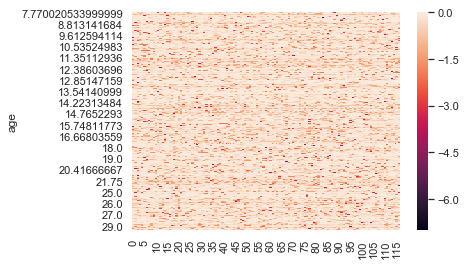

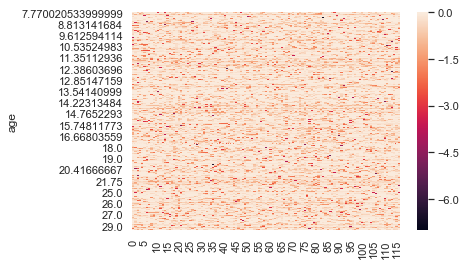

In [8]:
for model_name in model_names:
    heatmap_data = get_heatmap_data(save_dir + model_name)

    old_heatmap_data_shape = heatmap_data.shape
    ages = pd.read_csv(ages_dir)
    heatmap_data = pd.merge(heatmap_data, ages, on='pymc3_idx')
    assert old_heatmap_data_shape[0] == heatmap_data.shape[0], "Merging ages intco LLs chaged the number of rows!"
    print("heatmap_data.shape", heatmap_data.shape)

    plot_heatmap(heatmap_data)

## Correlations between RL and BF

In [5]:
heatmap_data_RL = get_heatmap_data(save_dir + model_names[0])
heatmap_data_BF = get_heatmap_data(save_dir + model_names[1])
heatmap_data_rand = get_heatmap_data(save_dir + 'summary_Bb_age_z_271_pymc3.csv')

In [10]:
corrs = []
for subject in heatmap_data_RL['pymc3_idx']:
    RL_subj = np.array(heatmap_data_RL[heatmap_data_RL['pymc3_idx'] == subject]).flatten()[1:]  # [1:] gets rid of subjID
    BF_subj = np.array(heatmap_data_BF[heatmap_data_BF['pymc3_idx'] == subject]).flatten()[1:]
    rand_subj = np.array(heatmap_data_rand[heatmap_data_BF['pymc3_idx'] == subject]).flatten()[1:]

    corr = np.corrcoef(RL_subj, BF_subj)[0, 1]
    corrs += [corr]

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maria\Anaconda3\envs\PYMC

In [11]:
np.mean(corrs), np.std(corrs)

(0.9813765591355365, 0.021168118951897914)

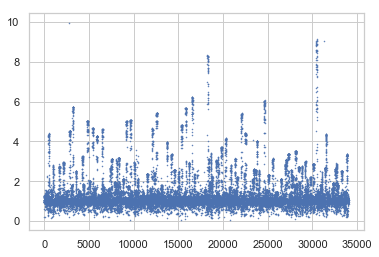

In [12]:
heatmap_data_RL = heatmap_data_RL.drop('pymc3_idx', axis=1)
heatmap_data_BF = heatmap_data_BF.drop('pymc3_idx', axis=1)

y = np.array(heatmap_data_RL).flatten()[1:] / np.array(heatmap_data_BF).flatten()[1:]
x = range(len(y))
plt.scatter(x, y, marker='.', s=1)

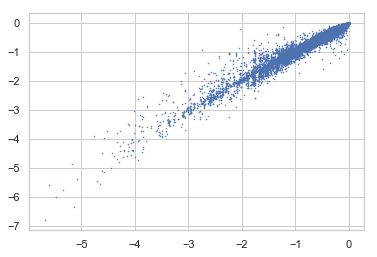

In [13]:
plt.scatter(np.array(heatmap_data_RL).flatten(), np.array(heatmap_data_BF).flatten(), marker='.', s=1)